# Introduction

In this notebook, I've used **CNN** to perform Image Classification on the Brain Tumor dataset.<br>
Since this dataset is small, if we train a neural network to it, it won't really give us a good result.<br>
Therefore, I'm going to use the concept of **Transfer Learning** and also custom CNN to train the model to compare accurate results.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Note:** Before you run, Import the dataset into your google drive and then try updating the paths specific to yout drive.

## 📚 Dataset: https://drive.google.com/drive/folders/1olI_u9_wkqnuJegqmMxwxaF0041Eswtw?usp=sharing

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
# for dirname, _, filenames in os.walk('/content/drive/MyDrive/Projects-for-Sale/Proj - 2 Skin Disease Identification Using Image Analysis/dataset (skin diseases)'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

---

# Data Preperation

In [2]:
labels = ["actinic keratosis", 
"dermatofibroma", 
"melanoma", 
"seborrheic keratosis", 
"squamous cell carcinoma",
# "Acne_and_rosacea",
# "Eczema",
# "Tinea_Ringworm"
]

In [3]:
%pwd

'C:\\Users\\vsneh\\OneDrive\\Desktop\\Sale Projects\\Proj - 2 Skin Disease Identification Using Image Analysis\\Main Code'

We start off by appending all the images from the  directories into a Python list and then converting them into numpy arrays after resizing it.

In [4]:
X_train = []
y_train = []
image_size = 150
dir = '../dataset (skin diseases)'
for i in labels:
    folderPath = os.path.join(dir,'Train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(dir,'Test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.46it/s]


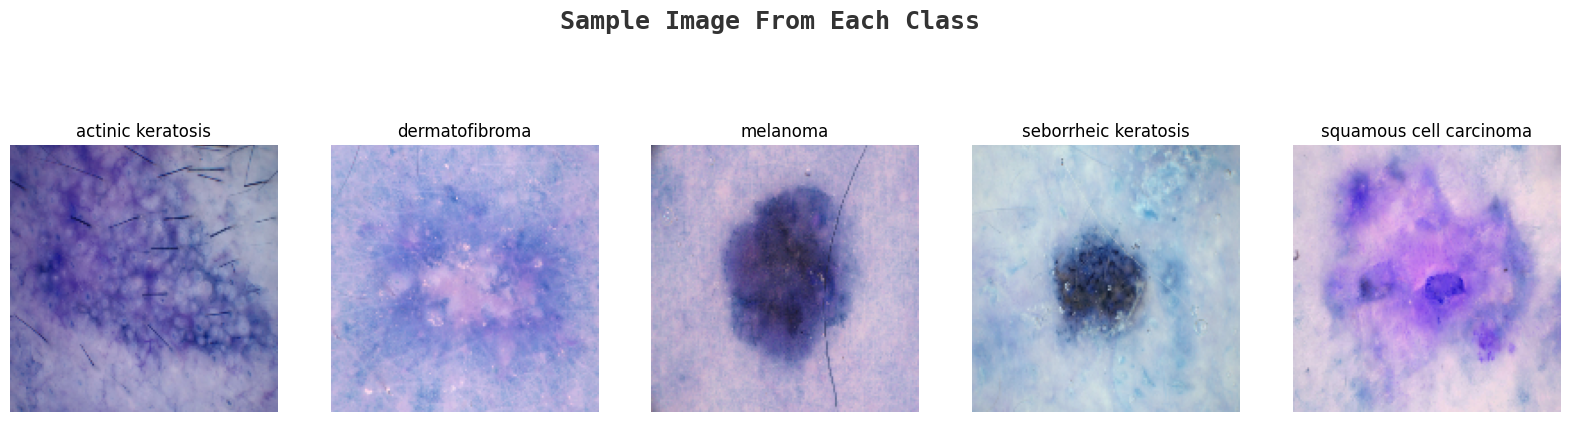

In [5]:
k=0
fig, ax = plt.subplots(1,5,figsize=(20,20))
fig.text(s='Sample Image From Each Class ',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [6]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [7]:
X_train.shape

(631, 150, 150, 3)

Dividing the dataset into **Training** and **Testing** sets.

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

Performing **One Hot Encoding** on the labels after converting it into numerical values:

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

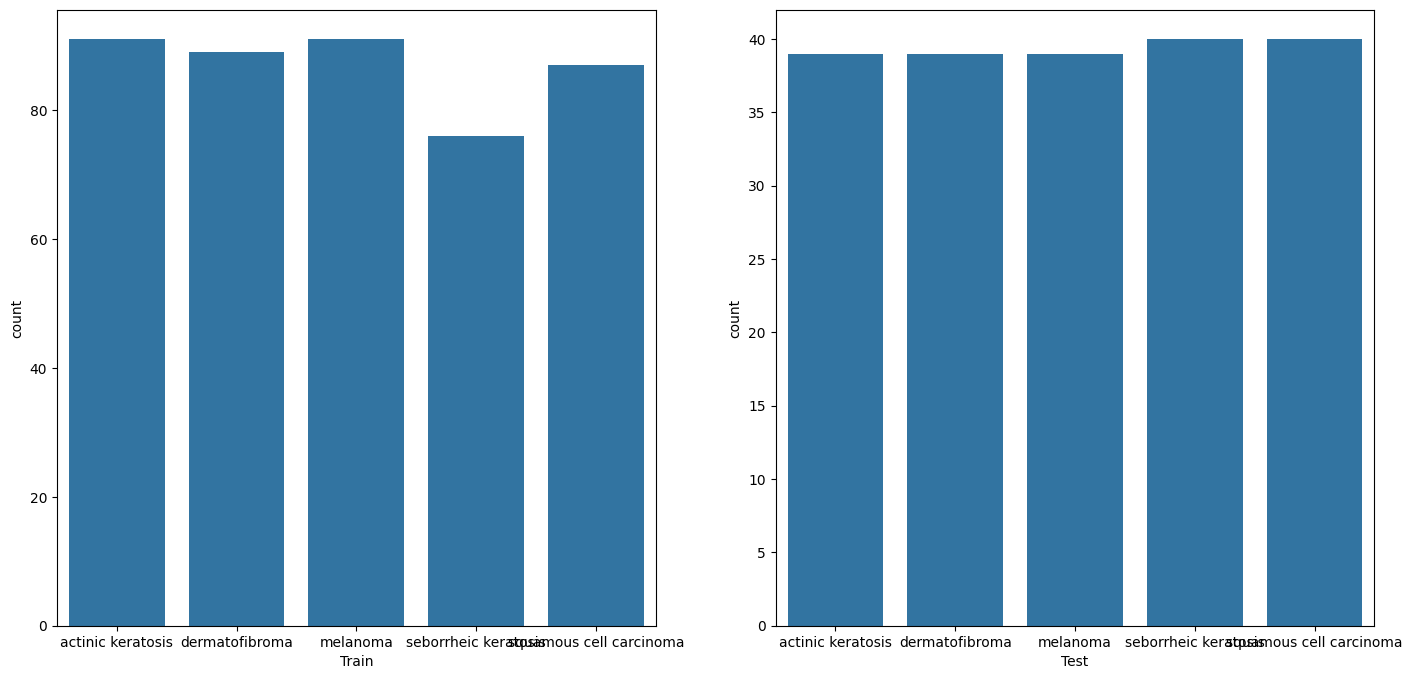

In [10]:
train_labels = []
test_labels = []

img_size= 300

for i in os.listdir(dir+'/Train/'):
    for j in os.listdir(dir+"/Train/"+i):
       train_labels.append(i)
        
for i in os.listdir(dir+'/Test/'):
    for j in os.listdir(dir+"/Test/"+i):
        test_labels.append(i)

plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

---

# Custom CNN

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Start training freshly
tf.keras.backend.clear_session()

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(image_size,image_size,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

C:\Users\vsneh\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         184,965 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278,341 (1.06 MB)

 Trainable params: 278,277 (1.06 MB)

 Non-trainable params: 64 (256.00 B)

In [13]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("skin-snehit.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [14]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =60, verbose=1, batch_size=16,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.2381 - loss: 6.4799
Epoch 1: val_accuracy improved from -inf to 0.28070, saving model to skin-snehit.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 421ms/step - accuracy: 0.2410 - loss: 6.3864 - val_accuracy: 0.2807 - val_loss: 1.5366 - learning_rate: 0.0010
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.4570 - loss: 1.1745
Epoch 2: val_accuracy improved from 0.28070 to 0.40351, saving model to skin-snehit.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 394ms/step - accuracy: 0.4574 - loss: 1.1728 - val_accuracy: 0.4035 - val_loss: 1.4255 - learning_rate: 0.0010
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.5698 - loss: 0.9692
Epoch 3: val_accuracy improved from 0.40351 to 0.45614, saving model to skin-snehit.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 384ms/step - accuracy: 0.5708 - loss: 0.9670 - val_accuracy: 0.4561 - val_loss: 1.2560 - learning_rate: 0.0010
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/st

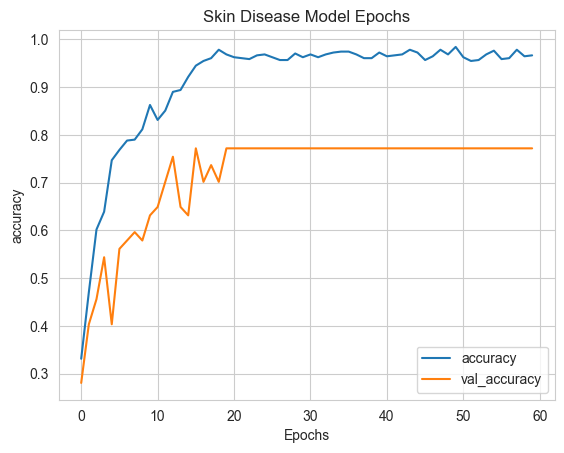

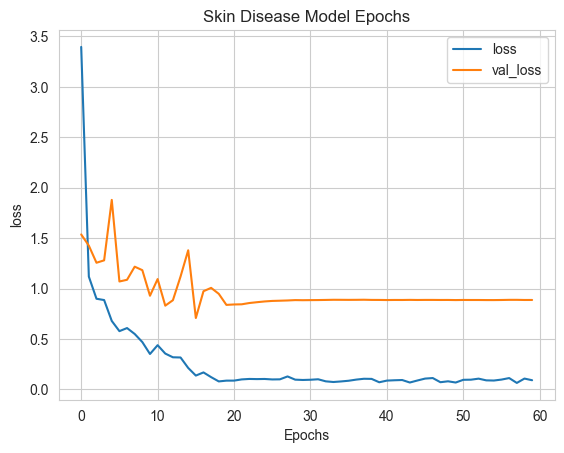

In [18]:
#Visualize Training
def plot_graphs(history, string):
    sns.set_style("whitegrid")
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.title("Skin Disease Model Epochs")
    plt.legend([string,"val_"+string])
    plt.show()
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

In [19]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.73      0.67      0.70        12
           2       0.83      0.77      0.80        13
           3       0.77      0.77      0.77        13
           4       0.59      0.67      0.62        15

    accuracy                           0.67        64
   macro avg       0.67      0.67      0.67        64
weighted avg       0.68      0.67      0.67        64



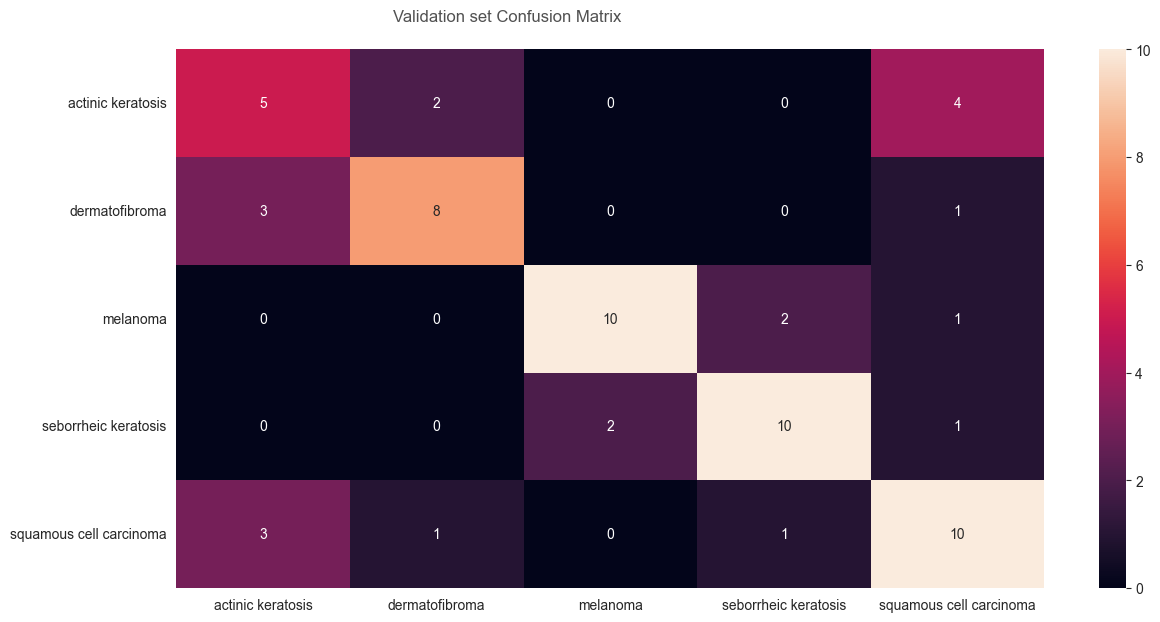

In [20]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Validation set Confusion Matrix',size=12,y=0.92,x=0.28,alpha=0.8)

plt.show()

**Callbacks** -> Callbacks can help you fix bugs more quickly, and can help you build better models. They can help you visualize how your model’s training is going, and can even help prevent overfitting by implementing early stopping or customizing the learning rate on each iteration.<br><br>
By definition, "A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training."

In this notebook, I'll be using **TensorBoard, ModelCheckpoint and ReduceLROnPlateau** callback functions

In [21]:
model.save('skin-snehit.keras')

# Transfer Learning _ EfficientNet B0

Deep convolutional neural network models may take days or even weeks to train on very large datasets.

A way to short-cut this process is to re-use the model weights from pre-trained models that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks. Top performing models can be downloaded and used directly, or integrated into a new model for your own computer vision problems.

In this notebook, I'll be using the **EfficientNetB0** model which will use the weights from the **ImageNet** dataset.

The include_top parameter is set to *False* so that the network doesn't include the top layer/ output layer from the pre-built model which allows us to add our own output layer depending upon our use case!

In [32]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**GlobalAveragePooling2D** -> This layer acts similar to the Max Pooling layer in CNNs, the only difference being is that it uses the Average values instead of the Max value while *pooling*. This really helps in decreasing the computational load on the machine while training.
<br><br>
**Dropout** -> This layer omits some of the neurons at each step from the layer making the neurons more independent from the neibouring neurons. It helps in avoiding overfitting. Neurons to be ommitted are selected at random. The **rate** parameter is the liklihood of a neuron activation being set to 0, thus dropping out the neuron

**Dense** -> This is the output layer which classifies the image into 1 of the 4 possible classes. It uses the **softmax** function which is a generalization of the sigmoid function.

In [33]:
tf.keras.backend.clear_session()

In [34]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(5,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [35]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 150, 150, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 150, 150, 3)       │               7 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_1 (Rescaling)       │ (None, 150, 150, 3)       │               0 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 151, 151, 3)       │               0 │ rescaling_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 75, 75, 32)        │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 75, 75, 32)        │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 75, 75, 32)        │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 75, 75, 32)        │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 75, 75, 32)        │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 75, 75, 32)        │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             288 │ block1a_se_reduce[0][0]    │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 4,055,976 (15.47 MB)

 Trainable params: 4,013,953 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

We finally compile our model.

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("skin-snehit.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =30, verbose=1, batch_size=16,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/30
52/52 [==============================] - ETA: 0s - loss: 1.2499 - accuracy: 0.5342
Epoch 1: val_accuracy improved from -inf to 0.54945, saving model to skin-snehit.h5
52/52 [==============================] - 18s 150ms/step - loss: 1.2499 - accuracy: 0.5342 - val_loss: 1.2890 - val_accuracy: 0.5495 - lr: 0.0010
Epoch 2/30
51/52 [============================>.] - ETA: 0s - loss: 0.5888 - accuracy: 0.7904
Epoch 2: val_accuracy improved from 0.54945 to 0.63736, saving model to skin-snehit.h5
52/52 [==============================] - 5s 100ms/step - loss: 0.5929 - accuracy: 0.7885 - val_loss: 1.2271 - val_accuracy: 0.6374 - lr: 0.0010
Epoch 3/30
51/52 [============================>.] - ETA: 0s - loss: 0.4432 - accuracy: 0.8493
Epoch 3: val_accuracy did not improve from 0.63736
52/52 [==============================] - 4s 86ms/step - loss: 0.4432 - accuracy: 0.8496 - val_loss: 1.3612 - val_accuracy: 0.6264 - lr: 0.0010
Epoch 4/30
51/52 [============================>.] - ETA: 0s - lo

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

4/4 [==============================] - 3s 214ms/step
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.88      0.93      0.90        15
           2       0.77      1.00      0.87        10
           3       0.93      0.78      0.85        18
           4       0.82      0.82      0.82        11
           5       1.00      0.75      0.86        16
           6       0.57      0.80      0.67         5
           7       0.64      0.78      0.70         9

    accuracy                           0.84       102
   macro avg       0.82      0.84      0.82       102
weighted avg       0.86      0.84      0.85       102



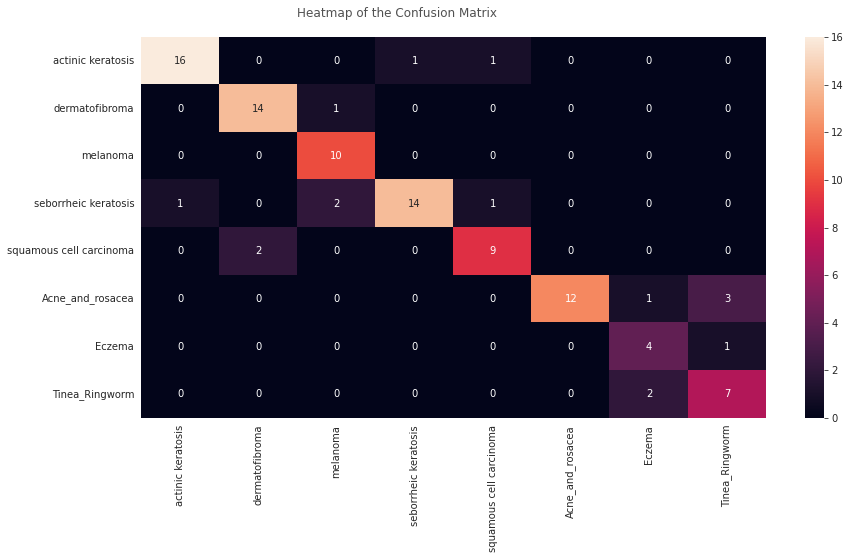

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=12,y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
model.save('snehit-skin.keras')

### Table for Training Dataset

In [ ]:
pred = model.predict(X_train)
pred = np.argmax(pred,axis=1)
y_train_new = np.argmax(y_train,axis=1)

matrix = confusion_matrix(y_train_new,pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.98319328, 0.96551724, 0.99145299, 1.        , 1.        ])

In [ ]:
import math
print(91, 89, 91, 76, 87)
print(math.ceil(0.98319328*91), math.ceil(0.96551724*89), math.ceil(0.99145299*91), math.ceil(1.0*76), math.ceil(1.0*87))
print(math.ceil(0.98319328*100), math.ceil(0.96551724*100), math.ceil(0.99145299*100), math.ceil(1.0*100), math.ceil(1.0*100))

91 89 91 76 87
90 86 91 76 87
99 97 100 100 100


### Table for Testing Dataset

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

matrix = confusion_matrix(y_test_new,pred)
matrix.diagonal()/matrix.sum(axis=1)

array([1.        , 0.91666667, 0.69230769, 1.        , 0.73333333])

In [ ]:
import math
print(39, 39, 39, 40, 40)
print(math.ceil(1.0*39), math.ceil(0.91666667*39), math.ceil(0.69230769*39), math.ceil(1.0*40), math.ceil(0.73333333*40))
print(math.ceil(1.0*100), math.ceil(0.91666667*100), math.ceil(0.69230769*100), math.ceil(1.0*100), math.ceil(0.73333333*100))

39 39 39 40 40
39 36 27 40 30
100 92 70 100 74


---

# Transfer Learning _ Inception V3

In [ ]:
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import pandas as pd
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import Model
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3

from keras.layers import Dense, BatchNormalization, GlobalAveragePooling2D, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, Nadam

In [ ]:
from keras.applications.inception_v3 import InceptionV3

tf.keras.backend.clear_session()

# We use model inceptionV3
pre_train_model = InceptionV3(
      include_top = False,
      weights = "imagenet",
      input_shape = (image_size,image_size, 3)      
)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# pre_train_model.summary()

In [ ]:
# just use a part of model because our task is simple so if use whole model will be overfitting

for layer in pre_train_model.layers:
    layer.trainable = False
last_layer = pre_train_model.get_layer('mixed9')  # cut begin to layer block8_9_mixed
last_output = pre_train_model.output

In [ ]:
# Add some custom layer to do our task, output will be 1 node
# x = MaxPooling2D(pool_size=(2,2))(last_output)
x = Flatten()(last_output)
# x = Dense(2048, activation='relu')(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
# x = Dense(512, activation='relu')(x)
# x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(5, activation='softmax')(x)

In [ ]:
# Define optimizer, learning rate and loss function
model = Model(pre_train_model.input, output)
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("Inception V3-model-28.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =28, verbose=1, batch_size=16,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/28
52/52 [==============================] - ETA: 0s - loss: 13.9524 - acc: 0.2005

52/52 [==============================] - 9s 78ms/step - loss: 13.9524 - acc: 0.2005 - val_loss: 5.1864 - val_acc: 0.2418 - lr: 1.0000e-04
Epoch 2/28
51/52 [============================>.] - ETA: 0s - loss: 5.1725 - acc: 0.2610

52/52 [==============================] - 1s 27ms/step - loss: 5.1670 - acc: 0.2616 - val_loss: 2.6734 - val_acc: 0.3516 - lr: 1.0000e-04
Epoch 3/28
52/52 [==============================] - ETA: 0s - loss: 2.5343 - acc: 0.2653

52/52 [==============================] - 1s 28ms/step - loss: 2.5343 - acc: 0.2653 - val_loss: 2.1043 - val_acc: 0.3297 - lr: 1.0000e-04
Epoch 4/28
51/52 [============================>.] - ETA: 0s - loss: 1.9144 - acc: 0.2953

52/52 [==============================] - 1s 27ms/step - loss: 1.9140 - acc: 0.2946 - val_loss: 1.6066 - val_acc: 0.3297 - lr: 1.0000e-04
Epoch 5/28
51/52 [============================>.] - ETA: 0s - loss: 1.7732 - acc: 0.2978

52/52 [==============================] - 2s 36ms/step - loss: 1.7696 - acc: 0.2995 - val_loss: 1.5903 - val_acc: 0.3956 - lr: 1.0000e-04
Epoch 6/28
51/52 [============================>.] - ETA: 0s - loss: 1.6796 - acc: 0.3309

52/52 [==============================] - 1s 27ms/step - loss: 1.6802 - acc: 0.3301 - val_loss: 1.7313 - val_acc: 0.3516 - lr: 1.0000e-04
Epoch 7/28
51/52 [============================>.] - ETA: 0s - loss: 1.6369 - acc: 0.3493

52/52 [==============================] - 1s 27ms/step - loss: 1.6424 - acc: 0.3484 - val_loss: 1.8127 - val_acc: 0.3297 - lr: 1.0000e-04
Epoch 8/28
52/52 [==============================] - ETA: 0s - loss: 1.6408 - acc: 0.3533

52/52 [==============================] - 1s 27ms/step - loss: 1.6408 - acc: 0.3533 - val_loss: 1.9458 - val_acc: 0.3516 - lr: 1.0000e-04
Epoch 9/28
50/52 [===========================>..] - ETA: 0s - loss: 1.5143 - acc: 0.4050

52/52 [==============================] - 1s 28ms/step - loss: 1.5163 - acc: 0.4046 - val_loss: 1.9769 - val_acc: 0.4286 - lr: 1.0000e-04
Epoch 10/28
51/52 [============================>.] - ETA: 0s - loss: 1.6027 - acc: 0.3701

52/52 [==============================] - 1s 27ms/step - loss: 1.6016 - acc: 0.3716 - val_loss: 2.0208 - val_acc: 0.4286 - lr: 1.0000e-04
Epoch 11/28
50/52 [===========================>..] - ETA: 0s - loss: 1.5641 - acc: 0.4100

52/52 [==============================] - 1s 27ms/step - loss: 1.5595 - acc: 0.4095 - val_loss: 1.7443 - val_acc: 0.3956 - lr: 1.0000e-04
Epoch 12/28
51/52 [============================>.] - ETA: 0s - loss: 1.5762 - acc: 0.3787

52/52 [==============================] - 1s 27ms/step - loss: 1.5731 - acc: 0.3802 - val_loss: 2.2673 - val_acc: 0.2857 - lr: 1.0000e-04
Epoch 13/28
50/52 [===========================>..] - ETA: 0s - loss: 1.6884 - acc: 0.4013

52/52 [==============================] - 1s 28ms/step - loss: 1.6838 - acc: 0.4010 - val_loss: 1.6791 - val_acc: 0.4615 - lr: 1.0000e-04
Epoch 14/28
51/52 [============================>.] - ETA: 0s - loss: 1.5473 - acc: 0.3934

52/52 [==============================] - 1s 27ms/step - loss: 1.5459 - acc: 0.3936 - val_loss: 1.7177 - val_acc: 0.3297 - lr: 1.0000e-04
Epoch 15/28
51/52 [============================>.] - ETA: 0s - loss: 1.6255 - acc: 0.3738

52/52 [==============================] - 1s 27ms/step - loss: 1.6285 - acc: 0.3729 - val_loss: 1.8195 - val_acc: 0.3077 - lr: 1.0000e-04
Epoch 16/28
50/52 [===========================>..] - ETA: 0s - loss: 1.6030 - acc: 0.3862

52/52 [==============================] - 1s 28ms/step - loss: 1.6054 - acc: 0.3839 - val_loss: 2.1730 - val_acc: 0.3626 - lr: 1.0000e-04
Epoch 17/28
50/52 [===========================>..] - ETA: 0s - loss: 1.5294 - acc: 0.3900

52/52 [==============================] - 1s 28ms/step - loss: 1.5341 - acc: 0.3863 - val_loss: 2.0961 - val_acc: 0.2967 - lr: 1.0000e-04
Epoch 18/28
50/52 [===========================>..] - ETA: 0s - loss: 1.6593 - acc: 0.3262

52/52 [==============================] - 1s 28ms/step - loss: 1.6603 - acc: 0.3240 - val_loss: 2.2845 - val_acc: 0.2637 - lr: 1.0000e-04
Epoch 19/28
50/52 [===========================>..] - ETA: 0s - loss: 1.5804 - acc: 0.3562

52/52 [==============================] - 1s 27ms/step - loss: 1.5873 - acc: 0.3557 - val_loss: 1.8465 - val_acc: 0.3077 - lr: 1.0000e-04
Epoch 20/28
51/52 [============================>.] - ETA: 0s - loss: 1.5723 - acc: 0.3676

52/52 [==============================] - 1s 28ms/step - loss: 1.5743 - acc: 0.3667 - val_loss: 2.4162 - val_acc: 0.3297 - lr: 1.0000e-04
Epoch 21/28
50/52 [===========================>..] - ETA: 0s - loss: 1.5197 - acc: 0.4075

52/52 [==============================] - 1s 27ms/step - loss: 1.5313 - acc: 0.4022 - val_loss: 1.9290 - val_acc: 0.3626 - lr: 1.0000e-04
Epoch 22/28
52/52 [==============================] - ETA: 0s - loss: 1.4540 - acc: 0.4291

52/52 [==============================] - 1s 27ms/step - loss: 1.4540 - acc: 0.4291 - val_loss: 2.1081 - val_acc: 0.3846 - lr: 1.0000e-04
Epoch 23/28
50/52 [===========================>..] - ETA: 0s - loss: 1.4162 - acc: 0.4350

52/52 [==============================] - 1s 27ms/step - loss: 1.4191 - acc: 0.4328 - val_loss: 1.5844 - val_acc: 0.3736 - lr: 1.0000e-04
Epoch 24/28
51/52 [============================>.] - ETA: 0s - loss: 1.3646 - acc: 0.4449

52/52 [==============================] - 1s 28ms/step - loss: 1.3666 - acc: 0.4438 - val_loss: 1.4334 - val_acc: 0.3956 - lr: 1.0000e-04
Epoch 25/28
50/52 [===========================>..] - ETA: 0s - loss: 1.3863 - acc: 0.4450

52/52 [==============================] - 1s 28ms/step - loss: 1.3827 - acc: 0.4487 - val_loss: 1.5721 - val_acc: 0.4176 - lr: 1.0000e-04
Epoch 26/28
51/52 [============================>.] - ETA: 0s - loss: 1.4019 - acc: 0.4412

52/52 [==============================] - 1s 27ms/step - loss: 1.3994 - acc: 0.4425 - val_loss: 1.9141 - val_acc: 0.3626 - lr: 1.0000e-04
Epoch 27/28
50/52 [===========================>..] - ETA: 0s - loss: 1.3929 - acc: 0.4425

52/52 [==============================] - 1s 28ms/step - loss: 1.3936 - acc: 0.4438 - val_loss: 1.8064 - val_acc: 0.4505 - lr: 1.0000e-04
Epoch 28/28
51/52 [============================>.] - ETA: 0s - loss: 1.3761 - acc: 0.4179

52/52 [==============================] - 1s 27ms/step - loss: 1.3747 - acc: 0.4181 - val_loss: 1.5609 - val_acc: 0.3626 - lr: 1.0000e-04


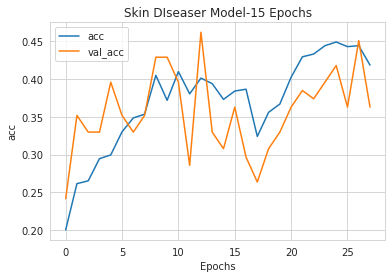

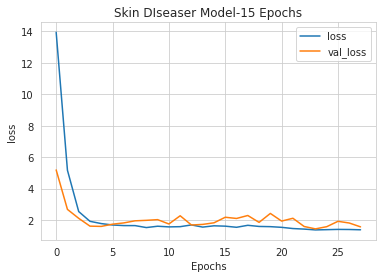

In [ ]:
#Visualize Training
def plot_graphs(history, string):
    sns.set_style("whitegrid")
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.title("Skin DIseaser Model-15 Epochs")
    plt.legend([string,"val_"+string])
    plt.show()
plot_graphs(history,'acc')
plot_graphs(history,'loss')

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

4/4 [==============================] - 0s 52ms/step
              precision    recall  f1-score   support

           0       0.23      0.17      0.19        18
           1       0.60      0.20      0.30        15
           2       0.60      0.90      0.72        10
           3       0.00      0.00      0.00        18
           4       0.22      0.64      0.33        11
           5       0.42      0.50      0.46        16
           6       0.25      0.40      0.31         5
           7       0.30      0.33      0.32         9

    accuracy                           0.34       102
   macro avg       0.33      0.39      0.33       102
weighted avg       0.32      0.34      0.30       102



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


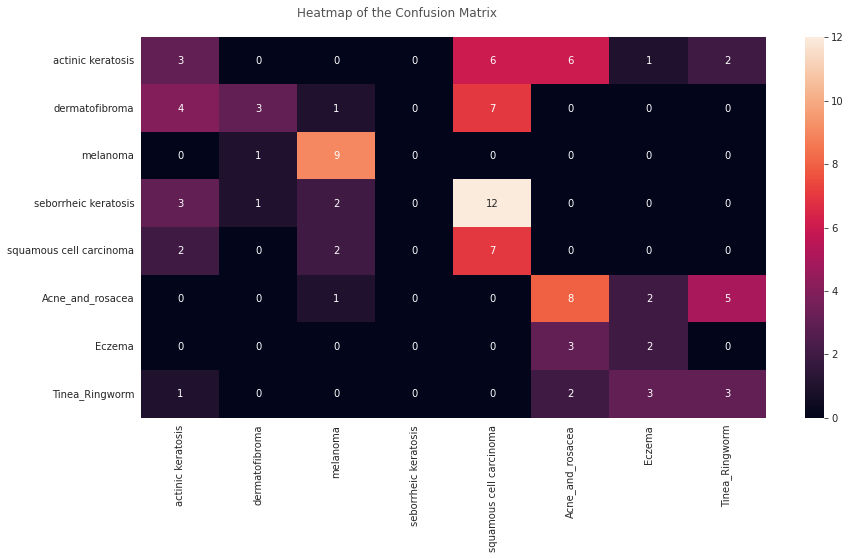

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=12,y=0.92,x=0.28,alpha=0.8)

plt.show()

# Bonus Content: Widgets

I've made these Widgets in which we can upload images from our local machine and predict whether the MRI scan has a Brain Tumour or not and to classify which Tumor it is.<br>
Unfortunately, it doesn't work on Kaggle but you can play around with this by downloading the notebook on your machine :)

In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

This is where you can upload the image by clicking on the **Upload** button:

In [ ]:


def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')

uploader = widgets.FileUpload()
display(uploader)
button = widgets.Button(description='Predict')
out = widgets.Output()

button.on_click(on_button_clicked)
widgets.VBox([button,out])

FileUpload(value={}, description='Upload')

After uploading the image, you can click on the **Predict** button below to make predictions:

# Vision Transformers

In [ ]:
pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
X_train = []
y_train = []
image_size = 150
dir = '/content/drive/MyDrive/Projects-for-Sale/Brain_Tumor_Classification/dataset'
for i in labels:
    folderPath = os.path.join(dir,'Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(dir,'Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 64/64 [00:00<00:00, 111.03it/s]


In [ ]:
num_classes = 4
input_shape = (150, 150, 3)
(x_train, x_test, y_train, y_test)  = train_test_split(X_train,y_train, test_size=0.1,random_state=101)
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (1215, 150, 150, 3) - y_train shape: (1215,)
x_test shape: (135, 150, 150, 3) - y_test shape: (135,)


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(72, 72),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

(-0.5, 149.5, 149.5, -0.5)

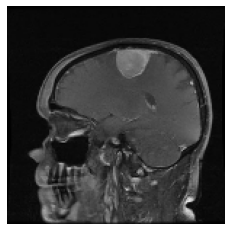

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 16
num_epochs = 28
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


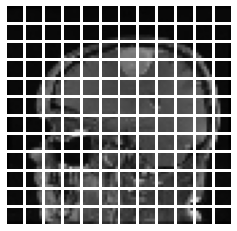

In [ ]:
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
!pwd

/content


In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/28


UnimplementedError: ignored